In [159]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from __future__ import division

In [144]:
net_momentum = MLPClassifier(hidden_layer_sizes=(10, 5), solver='sgd', random_state=1, momentum=0.9, max_iter=10000) 

In [160]:
train_X = np.genfromtxt('orig_data_training.dat', delimiter=',', unpack=True)[4670:]
test_X = np.genfromtxt('orig_data_testing.dat', delimiter=',', unpack=True)[1382:]

phones = {'UW': 1, 'IY': 1, 'AA': 0, 'EH': 0}

y = []
with open('orig_phones_training.dat') as f:
    for line in f:
        y.append(line.replace('"', '').replace(',', '').strip().split(','))

fixed = []
for l in y:
    for string in l:
        fixed.append(','.join(string[i:i+2] for i in range(0, len(string), 2)))
        
train_Y = fixed[0].split(',')
fixed_labels = train_Y[4670:]

y2 = []
with open('orig_phones_testing.dat') as f:
    for line in f:
        y2.append(line.replace('"', '').replace(',', '').strip().split(','))

fixed2 = []
for l in y2:
    for string in l:
        fixed2.append(','.join(string[i:i+2] for i in range(0, len(string), 2)))
        
test_Y = fixed2[0].split(',')
fixed_labels2 = test_Y[1382:]

test_Y_data = []
train_Y_data = []
for label in fixed_labels2:
    test_Y_data.append(phones[label])
    
for label in fixed_labels:
    train_Y_data.append(phones[label])

    
net_momentum.fit(train_X, train_Y_data)
predict = net_momentum.predict(test_X)
net_momentum.score(test_X, test_Y_data)
con_mat = confusion_matrix(test_Y_data, predict)
acc = (con_mat[0,0] + con_mat[1,1]) / sum(sum(con_mat))

In [149]:
con_mat

array([[ 472,   18],
       [  17, 1044]])

In [162]:
train_X.shape

(3857L, 39L)

In [161]:
acc

0.97743391360412635

In [154]:
sum(sum(con_mat))

1551

In [158]:
con_mat[1,1] + con_mat[0,0]

1516

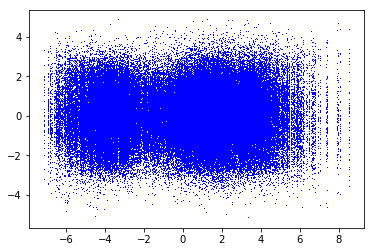

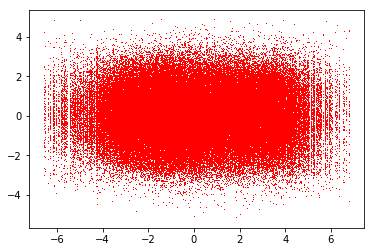

In [164]:
pca_2 = PCA(n_components=2)
pca_2.fit(train_X)
pca_2_transform = pca_2.transform(train_X)
plt.figure()
plt.plot(pca_2_transform[:,:1], train_X, 'b,')
plt.figure()
plt.plot(pca_2_transform[:,1:], train_X, 'r,')
plt.show()